In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pylab as pylab

In [68]:
mydata = pd.read_csv('/content/helix_parameters.csv')

In [69]:
mydata.head()

,job_n,Energy,n_helices,r0_A,r0_B,r0_C,omega0,delta_omega0_A,delta_omega0_B,delta_omega0_C,z0_offset_A,z0_offset_B,z0_offset_C,helix1 phase,helix 2 phase,helix3 phase,invert_A,invert_B,invert_C,z1_offset_A,z1_offset_B,z1_offset_C,delta_t_A,delta_t_B,delta_t_C,omega1,z1
0,36019,-387.167,3,6.0,6.0,6.0,0,0,120,240,0,0,0,0,0,0,0,1,0,0,0.6,-3.0,0,0,0,99.999268,1.51
1,36022,-402.606,3,6.0,6.0,6.0,0,0,120,240,0,0,0,0,0,0,0,1,0,0,0.6,0.6,0,0,0,99.999268,1.51
2,36020,-395.944,3,6.0,6.0,6.0,0,0,120,240,0,0,0,0,0,0,0,1,0,0,0.6,-1.8,0,0,0,99.999268,1.51
3,36002,-389.788,3,6.0,6.0,6.0,0,0,120,240,0,0,0,0,0,0,0,1,0,0,-3.0,-1.8,0,0,0,99.999268,1.51
4,36005,-388.016,3,6.0,6.0,6.0,0,0,120,240,0,0,0,0,0,0,0,1,0,0,-3.0,1.8,0,0,0,99.999268,1.51


In [70]:
mydata.columns

Index(['job_n', 'Energy', 'n_helices', 'r0_A', 'r0_B', 'r0_C', 'omega0',
       'delta_omega0_A', 'delta_omega0_B', 'delta_omega0_C', 'z0_offset_A',
       'z0_offset_B', 'z0_offset_C', 'helix1 phase', 'helix 2 phase',
       'helix3 phase', 'invert_A', 'invert_B', 'invert_C', 'z1_offset_A',
       'z1_offset_B', 'z1_offset_C', 'delta_t_A', 'delta_t_B', 'delta_t_C',
       'omega1', 'z1'],
      dtype='object')

In [71]:
mydata.shape

(47475, 27)

In [72]:
head_count = mydata[['Energy', 'helix1 phase', 'helix 2 phase']]
head_count.head()

,Energy,helix1 phase,helix 2 phase
0,-387.167,0,0
1,-402.606,0,0
2,-395.944,0,0
3,-389.788,0,0
4,-388.016,0,0


In [73]:
file_name = head_count.groupby(['helix1 phase', 'helix 2 phase']).mean()
file_name.head()

Energy
helix1 phase helix 2 phase            
0            0             -392.419841
             20            -389.622691
             40            -390.318620
             60            -392.198537
             80            -393.661624

In [74]:
file_name = file_name.reset_index()
file_name.head()

,helix1 phase,helix 2 phase,Energy
0,0,0,-392.419841
1,0,20,-389.622691
2,0,40,-390.318620
3,0,60,-392.198537
4,0,80,-393.661624


In [75]:
file_name.pivot(index='helix1 phase', columns='helix 2 phase', values='Energy').head()

helix 2 phase,0,20,40,60,80,100,120,140,160,180
helix1 phase,,,,,,,,,,
0,-392.419841,-389.622691,-390.318620,-392.198537,-393.661624,-392.226253,-390.955112,-394.319969,-392.594862,-389.254009
20,-390.013375,-393.121438,-390.435441,-390.489424,-395.112815,-389.307695,-393.365839,-392.171938,-389.534864,-391.171958
40,-393.751152,-392.486692,-388.967952,-393.297131,-391.750444,-394.077600,-392.610059,-384.873483,-393.059775,-392.283178
60,-392.960539,-390.578310,-393.441091,-390.007804,-393.577453,-390.840711,-390.734280,-392.706732,-392.278805,-391.558888
80,-392.347250,-393.919370,-392.575410,-394.918433,-391.945480,-388.600299,-393.314092,-392.258363,-392.636642,-393.471684


<Axes: title={'center': 'Energy Fron Helix Phases'}, xlabel='helix 2 phase', ylabel='helix1 phase'>

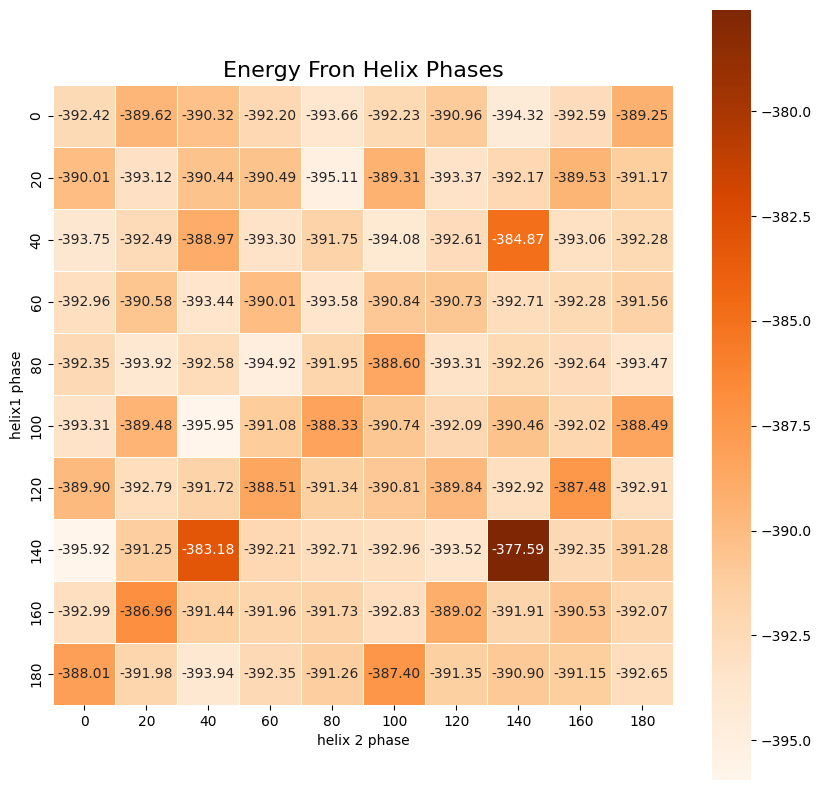

In [76]:
plt.figure(figsize=(10,10))
pivot_table = file_name.pivot(index='helix1 phase', columns='helix 2 phase', values='Energy')
plt.xlabel('helix 2 phase', size = 10)
plt.ylabel('helix1 phase', size = 10)
plt.title('Energy Fron Helix Phases', size = 16)
sns.heatmap(pivot_table, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = "Oranges")


In [77]:
first_data = pd.read_csv('/content/helix_parameters.csv')
first_data.head()

,job_n,Energy,n_helices,r0_A,r0_B,r0_C,omega0,delta_omega0_A,delta_omega0_B,delta_omega0_C,z0_offset_A,z0_offset_B,z0_offset_C,helix1 phase,helix 2 phase,helix3 phase,invert_A,invert_B,invert_C,z1_offset_A,z1_offset_B,z1_offset_C,delta_t_A,delta_t_B,delta_t_C,omega1,z1
0,36019,-387.167,3,6.0,6.0,6.0,0,0,120,240,0,0,0,0,0,0,0,1,0,0,0.6,-3.0,0,0,0,99.999268,1.51
1,36022,-402.606,3,6.0,6.0,6.0,0,0,120,240,0,0,0,0,0,0,0,1,0,0,0.6,0.6,0,0,0,99.999268,1.51
2,36020,-395.944,3,6.0,6.0,6.0,0,0,120,240,0,0,0,0,0,0,0,1,0,0,0.6,-1.8,0,0,0,99.999268,1.51
3,36002,-389.788,3,6.0,6.0,6.0,0,0,120,240,0,0,0,0,0,0,0,1,0,0,-3.0,-1.8,0,0,0,99.999268,1.51
4,36005,-388.016,3,6.0,6.0,6.0,0,0,120,240,0,0,0,0,0,0,0,1,0,0,-3.0,1.8,0,0,0,99.999268,1.51


In [79]:
first_data.columns

Index(['job_n', 'Energy', 'n_helices', 'r0_A', 'r0_B', 'r0_C', 'omega0',
       'delta_omega0_A', 'delta_omega0_B', 'delta_omega0_C', 'z0_offset_A',
       'z0_offset_B', 'z0_offset_C', 'helix1 phase', 'helix 2 phase',
       'helix3 phase', 'invert_A', 'invert_B', 'invert_C', 'z1_offset_A',
       'z1_offset_B', 'z1_offset_C', 'delta_t_A', 'delta_t_B', 'delta_t_C',
       'omega1', 'z1'],
      dtype='object')

In [80]:
data = first_data[['helix1 phase', 'helix 2 phase', 'helix3 phase', 'Energy']]
data2 = data
data.head()

,helix1 phase,helix 2 phase,helix3 phase,Energy
0,0,0,0,-387.167
1,0,0,0,-402.606
2,0,0,0,-395.944
3,0,0,0,-389.788
4,0,0,0,-388.016


In [81]:
data = data.groupby(['helix1 phase', 'helix 2 phase', 'helix3 phase']).mean()
low = data2.groupby(['helix1 phase', 'helix 2 phase', 'helix3 phase']).min()
data.head(10)

Energy
helix1 phase helix 2 phase helix3 phase            
0            0             0            -390.841159
                           20           -398.514000
                           40           -388.202256
                           60           -393.387828
                           80           -389.414933
                           100          -390.149192
                           120          -396.537197
                           140          -386.263636
                           160          -393.241320
                           180          -393.726071

In [82]:
data = data.reset_index()
data2 = data2.reset_index()
data.head()

,helix1 phase,helix 2 phase,helix3 phase,Energy
0,0,0,0,-390.841159
1,0,0,20,-398.514000
2,0,0,40,-388.202256
3,0,0,60,-393.387828
4,0,0,80,-389.414933


In [83]:
data2.head()

,index,helix1 phase,helix 2 phase,helix3 phase,Energy
0,0,0,0,0,-387.167
1,1,0,0,0,-402.606
2,2,0,0,0,-395.944
3,3,0,0,0,-389.788
4,4,0,0,0,-388.016


<ipython-input-84-aa9ee6efb53e>:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = fig.colorbar(colmap)


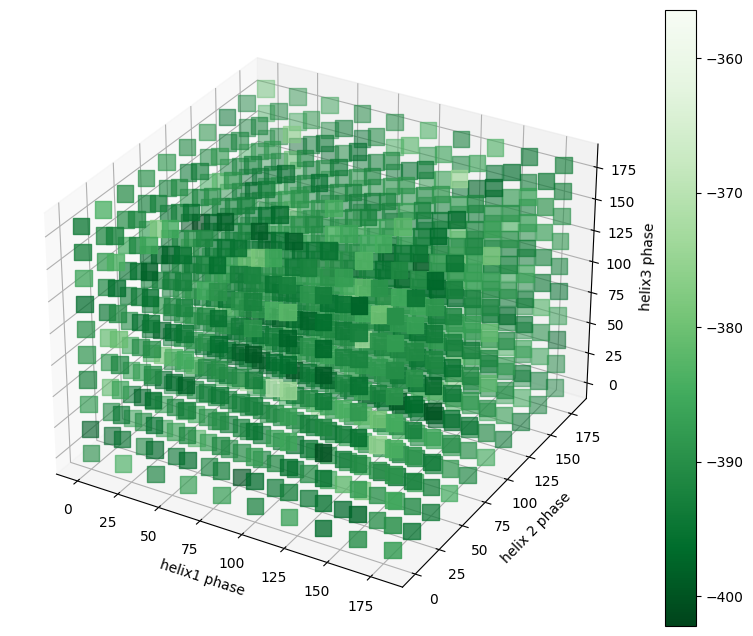

In [84]:
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection= '3d')
colmap = cm.ScalarMappable(cmap=cm.Greens_r)
colmap.set_array(data[['Energy']])
ax.scatter(data[['helix1 phase']], data[['helix 2 phase']], data[['helix3 phase']], marker='s',s = 140, c=data[['Energy']], cmap='Greens_r')
cb = fig.colorbar(colmap)
ax.set_xlabel('helix1 phase')
ax.set_ylabel('helix 2 phase')
ax.set_zlabel('helix3 phase')
plt.show()

In [85]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15,5),
          'axes.labelsize': '17',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}


In [88]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (25,25));

filt_data = first_data[[index='helix1 phase', columns='helix 2 phase', values='Energy']];
filt_data = filt_data.groupby(['helix1 phase', 'helix 2 phase']).mean();
filt_data = filt_data.reset_index();
pivot_0_0 = filt_data.pivot(index='helix1 phase', columns='helix 2 phase', values='Energy')
sns.heatmap(pivot_0_0, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r', ax = axes[0], cbar = False);

filt_data = first_data[[index='helix1 phase', columns='helix3 phase', values='Energy']];
filt_data = filt_data.groupby(['helix1 phase', 'helix3 phase']).mean();
filt_data = filt_data.reset_index();
pivot_0_1 = filt_data.pivot(index='helix1 phase', columns='helix3 phase', values='Energy');
sns.heatmap(pivot_0_1, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r', ax = axes[1], cbar = False);

filt_data = first_data[[index='helix 2 phase', columns='helix3 phase', values='Energy']];
filt_data = filt_data.groupby(['helix 2 phase', 'helix3 phase']).mean();
filt_data = filt_data.reset_index();
pivot_0_2 = filt_data.pivot(index='helix 2 phase', columns='helix3 phase', values='Energy');
sns.heatmap(pivot_0_2, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r', ax = axes[2], cbar = False);

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-88-d36342f21f25>, line 3)

In [92]:
# First heatmap
filt_data = first_data[[index='helix1 phase', columns='helix 2 phase', values='Energy']]
filt_data = filt_data.groupby(['helix1 phase', 'helix 2 phase']).mean().reset_index()
pivot_0_0 = filt_data.pivot('helix1 phase', 'helix 2 phase', 'Energy')
sns.heatmap(pivot_0_0, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Blues_r', ax=axes[0], cbar=False)

# Second heatmap
filt_data = first_data[[index=='helix1 phase', columns='helix3 phase', values='Energy']]
filt_data = filt_data.groupby(['helix1 phase', 'helix3 phase']).mean().reset_index()
pivot_0_1 = filt_data.pivot('helix1 phase', 'helix3 phase', 'Energy')
sns.heatmap(pivot_0_1, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Blues_r', ax=axes[1], cbar=False)

# Third heatmap
filt_data = first_data[[index=='helix 2 phase', columns='helix3 phase', values='Energy']]
filt_data = filt_data.groupby(['helix 2 phase', 'helix3 phase']).mean().reset_index()
pivot_0_2 = filt_data.pivot('helix 2 phase', 'helix3 phase', 'Energy')
sns.heatmap(pivot_0_2, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Blues_r', ax=axes[2], cbar=False)

# Display the plot
plt.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-92-893e127d0ba0>, line 2)